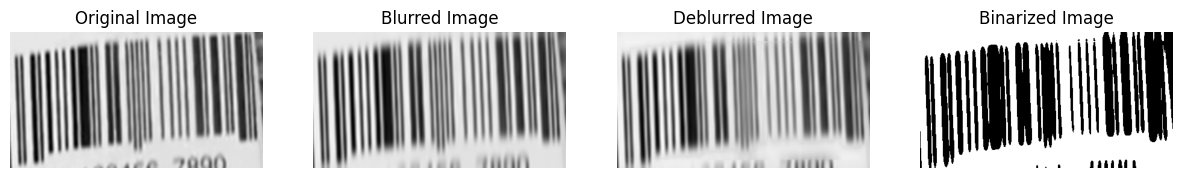

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [1]:
import numpy as np
import cv2
from scipy.signal import wiener
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

def normalize_kernel(kernel):
    return kernel / np.sum(kernel)

def generate_initial_kernel(length):
    kernel = np.ones(length) / length
    return kernel

def apply_motion_blur(image, kernel_length):
    kernel = np.zeros(kernel_length)
    kernel[:kernel_length//2] = np.linspace(0, 1, kernel_length//2)
    kernel[kernel_length//2:] = np.linspace(1, 0, kernel_length//2)
    kernel = normalize_kernel(kernel)
    
    blurred_image = cv2.filter2D(image, -1, kernel[:, np.newaxis])
    return blurred_image, kernel

def deblur_image(image, initial_kernel, noise_var=0.01, iterations=1000):
    best_kernel = initial_kernel.copy()
    best_score = np.inf
    height, width = image.shape
    
    for _ in range(iterations):
        candidate_kernel = best_kernel + np.random.uniform(-0.05, 0.05, best_kernel.shape)
        candidate_kernel = np.clip(candidate_kernel, 0, 1)
        candidate_kernel = normalize_kernel(candidate_kernel)
        
        deblurred = wiener(image, candidate_kernel.shape[0], noise_var)
        hist, _ = np.histogram(deblurred, bins=256, range=(0, 1))
        
        bimodality = np.sum(hist[:128]) * np.sum(hist[128:])
        
        if bimodality < best_score:
            best_score = bimodality
            best_kernel = candidate_kernel.copy()
    
    final_deblurred = wiener(image, best_kernel.shape[0], noise_var)
    return final_deblurred, best_kernel

def binarize_image(image):
    threshold = np.mean(image)
    binary_image = (image > threshold).astype(np.uint8) * 255
    return binary_image

def process_barcode_image(image_path, kernel_length=30):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = image / 255.0  
    
    blurred_image, true_kernel = apply_motion_blur(image, kernel_length)
    
    initial_kernel = generate_initial_kernel(kernel_length)
    deblurred_image, estimated_kernel = deblur_image(blurred_image, initial_kernel)
    binary_image = binarize_image(deblurred_image)
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].imshow(image, cmap='gray'); axs[0].set_title('Original Image')
    axs[1].imshow(blurred_image, cmap='gray'); axs[1].set_title('Blurred Image')
    axs[2].imshow(deblurred_image, cmap='gray'); axs[2].set_title('Deblurred Image')
    axs[3].imshow(binary_image, cmap='gray'); axs[3].set_title('Binarized Image')
    for ax in axs: ax.axis('off')
    plt.show()
    
    return binary_image


process_barcode_image("blur_barcode.png", kernel_length=30)


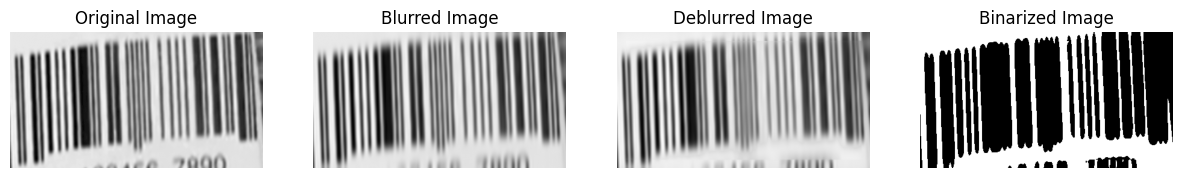

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [2]:
import numpy as np
import cv2
from scipy.signal import wiener
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

def normalize_kernel(kernel):
    return kernel / np.sum(kernel)

def generate_initial_kernel(length):
    kernel = np.ones(length) / length
    return kernel

def apply_motion_blur(image, kernel_length):
    kernel = np.zeros(kernel_length)
    kernel[:kernel_length//2] = np.linspace(0, 1, kernel_length//2)
    kernel[kernel_length//2:] = np.linspace(1, 0, kernel_length//2)
    kernel = normalize_kernel(kernel)
    
    blurred_image = cv2.filter2D(image, -1, kernel[:, np.newaxis])
    return blurred_image, kernel

def deblur_image(image, initial_kernel, noise_var=0.01, iterations=1000):
    best_kernel = initial_kernel.copy()
    best_score = np.inf
    height, width = image.shape
    
    for _ in range(iterations):
        candidate_kernel = best_kernel + np.random.uniform(-0.05, 0.05, best_kernel.shape)
        candidate_kernel = np.clip(candidate_kernel, 0, 1)
        candidate_kernel = normalize_kernel(candidate_kernel)
        
        deblurred = wiener(image, candidate_kernel.shape[0], noise_var)
        hist, _ = np.histogram(deblurred, bins=256, range=(0, 1))
        
        bimodality = np.sum(hist[:128]) * np.sum(hist[128:])
        
        if bimodality < best_score:
            best_score = bimodality
            best_kernel = candidate_kernel.copy()
    
    final_deblurred = wiener(image, best_kernel.shape[0], noise_var)
    return final_deblurred, best_kernel

def binarize_image(image, threshold_factor=1.2):  # 기본적으로 평균보다 20% 높은 임계값 설정
    threshold = np.mean(image) * threshold_factor  
    binary_image = (image > threshold).astype(np.uint8) * 255  
    return binary_image

def process_barcode_image(image_path, kernel_length=30):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = image / 255.0  
    
    blurred_image, true_kernel = apply_motion_blur(image, kernel_length)
    
    initial_kernel = generate_initial_kernel(kernel_length)
    deblurred_image, estimated_kernel = deblur_image(blurred_image, initial_kernel)
    binary_image = binarize_image(deblurred_image, threshold_factor=1.2)
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].imshow(image, cmap='gray'); axs[0].set_title('Original Image')
    axs[1].imshow(blurred_image, cmap='gray'); axs[1].set_title('Blurred Image')
    axs[2].imshow(deblurred_image, cmap='gray'); axs[2].set_title('Deblurred Image')
    axs[3].imshow(binary_image, cmap='gray'); axs[3].set_title('Binarized Image')
    for ax in axs: ax.axis('off')
    plt.show()
    
    return binary_image

# 바코드 이미지 블러 제거 실행 예시
process_barcode_image("blur_barcode.png", kernel_length=30)

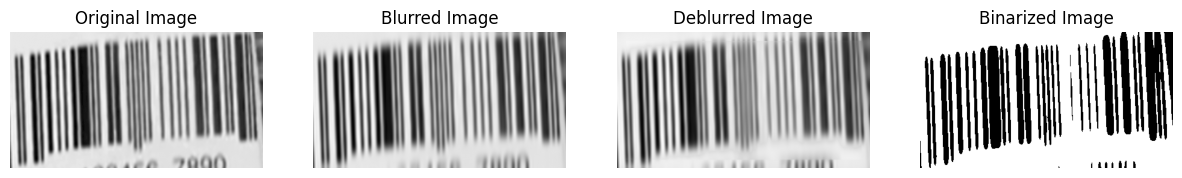

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

: 

In [ ]:
import numpy as np
import cv2
from scipy.signal import wiener
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

def normalize_kernel(kernel):
    return kernel / np.sum(kernel)

def generate_initial_kernel(length):
    kernel = np.ones(length) / length
    return kernel

def apply_motion_blur(image, kernel_length):
    kernel = np.zeros(kernel_length)
    kernel[:kernel_length//2] = np.linspace(0, 1, kernel_length//2)
    kernel[kernel_length//2:] = np.linspace(1, 0, kernel_length//2)
    kernel = normalize_kernel(kernel)
    
    blurred_image = cv2.filter2D(image, -1, kernel[:, np.newaxis])
    return blurred_image, kernel

def deblur_image(image, initial_kernel, noise_var=0.01, iterations=1000):
    best_kernel = initial_kernel.copy()
    best_score = np.inf
    height, width = image.shape
    
    for _ in range(iterations):
        candidate_kernel = best_kernel + np.random.uniform(-0.05, 0.05, best_kernel.shape)
        candidate_kernel = np.clip(candidate_kernel, 0, 1)
        candidate_kernel = normalize_kernel(candidate_kernel)
        
        deblurred = wiener(image, candidate_kernel.shape[0], noise_var)
        hist, _ = np.histogram(deblurred, bins=256, range=(0, 1))
        
        bimodality = np.sum(hist[:128]) * np.sum(hist[128:])
        
        if bimodality < best_score:
            best_score = bimodality
            best_kernel = candidate_kernel.copy()
    
    final_deblurred = wiener(image, best_kernel.shape[0], noise_var)
    return final_deblurred, best_kernel

def binarize_image(image, threshold_factor=0.9):  # 기본적으로 평균보다 20% 높은 임계값 설정
    threshold = np.mean(image) * threshold_factor  
    binary_image = (image > threshold).astype(np.uint8) * 255  
    return binary_image

def process_barcode_image(image_path, kernel_length=30):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = image / 255.0  
    
    blurred_image, true_kernel = apply_motion_blur(image, kernel_length)
    
    initial_kernel = generate_initial_kernel(kernel_length)
    deblurred_image, estimated_kernel = deblur_image(blurred_image, initial_kernel)
    binary_image = binarize_image(deblurred_image, threshold_factor=0.9)
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].imshow(image, cmap='gray'); axs[0].set_title('Original Image')
    axs[1].imshow(blurred_image, cmap='gray'); axs[1].set_title('Blurred Image')
    axs[2].imshow(deblurred_image, cmap='gray'); axs[2].set_title('Deblurred Image')
    axs[3].imshow(binary_image, cmap='gray'); axs[3].set_title('Binarized Image')
    for ax in axs: ax.axis('off')
    plt.show()
    
    return binary_image

# 바코드 이미지 블러 제거 실행 예시
process_barcode_image("blur_barcode.png", kernel_length=30)

In [ ]:
import numpy as np
import cv2
from scipy.signal import wiener
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

def normalize_kernel(kernel):
    return kernel / np.sum(kernel)

def generate_initial_kernel(length):
    kernel = np.ones(length) / length
    return kernel

def apply_motion_blur(image, kernel_length):
    kernel = np.zeros(kernel_length)
    kernel[:kernel_length//2] = np.linspace(0, 1, kernel_length//2)
    kernel[kernel_length//2:] = np.linspace(1, 0, kernel_length//2)
    kernel = normalize_kernel(kernel)
    
    blurred_image = cv2.filter2D(image, -1, kernel[:, np.newaxis])
    return blurred_image, kernel

def deblur_image(image, initial_kernel, noise_var=0.01, iterations=1000):
    best_kernel = initial_kernel.copy()
    best_score = np.inf
    height, width = image.shape
    
    for _ in range(iterations):
        candidate_kernel = best_kernel + np.random.uniform(-0.05, 0.05, best_kernel.shape)
        candidate_kernel = np.clip(candidate_kernel, 0, 1)
        candidate_kernel = normalize_kernel(candidate_kernel)
        
        deblurred = wiener(image, candidate_kernel.shape[0], noise_var)
        hist, _ = np.histogram(deblurred, bins=256, range=(0, 1))
        
        bimodality = np.sum(hist[:128]) * np.sum(hist[128:])
        
        if bimodality < best_score:
            best_score = bimodality
            best_kernel = candidate_kernel.copy()
    
    final_deblurred = wiener(image, best_kernel.shape[0], noise_var)
    return final_deblurred, best_kernel

def binarize_image(image, threshold_factor=1):  # 기본적으로 평균보다 20% 높은 임계값 설정
    threshold = np.mean(image) * threshold_factor  
    binary_image = (image > threshold).astype(np.uint8) * 255  
    return binary_image

def process_barcode_image(image_path, kernel_length=30):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = image / 255.0  
    
    blurred_image, true_kernel = apply_motion_blur(image, kernel_length)
    
    initial_kernel = generate_initial_kernel(kernel_length)
    deblurred_image, estimated_kernel = deblur_image(blurred_image, initial_kernel)
    binary_image = binarize_image(deblurred_image, threshold_factor=0.9)
    
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].imshow(image, cmap='gray'); axs[0].set_title('Original Image')
    axs[1].imshow(blurred_image, cmap='gray'); axs[1].set_title('Blurred Image')
    axs[2].imshow(deblurred_image, cmap='gray'); axs[2].set_title('Deblurred Image')
    axs[3].imshow(binary_image, cmap='gray'); axs[3].set_title('Binarized Image')
    for ax in axs: ax.axis('off')
    plt.show()
    
    return binary_image

# 바코드 이미지 블러 제거 실행 예시
process_barcode_image("cropped_region_0.png", kernel_length=30)

